# Practicum Convolution Neural Nets (CNN)

## Imports

In [16]:
# Voeg imports toe als je ze nodig hebt

## Bronnen

EuroSAT project: https://github.com/phelber/eurosat

Pytorch Neural Nets: https://pytorch.org/docs/stable/nn.html

Kernels: https://en.wikipedia.org/wiki/Kernel_(image_processing)

A simple CNN with Pytorch: https://tomroth.com.au/pytorch-cnn

A guide to convolution arithmetic for deep learning: https://arxiv.org/pdf/1603.07285.pdf

Using Dropout Regularization in PyTorch Models: https://machinelearningmastery.com/using-dropout-regularization-in-pytorch-models

## Context

Dit practicum bestaat uit twee onderdelen: het toepassen van een convolutie en pooling filter, en het bouwen en trainen van een eenvoudig convolutional neural net dat een industrieterrein van een bos kan onderscheiden. Voor beide oefeningen gebruiken we de EuroSAT_RGB dataset.

## Voorbereiding

1.  Download de EuroSAT_RGB dataset.

Zie https://zenodo.org/record/7711810#.ZAm3k-zMKEA voor de beschrijving.


2. Unzip de EuroSAT_RGB.zip in de folder van dit notebook (. path) en bekijk de inhoud.

## Opdrachten

### Opdracht 1: afbeelding inladen

PyTorch Vision maakt het inladen van afbeeldingen gemakkelijk via:

https://pytorch.org/vision/stable/io.html

In [17]:
# a. Localiseer de afbeelding 'Industrial_1.jpg'

# b. Wat is het relative pad van 'Industrial_1.jpg'?

# c. Bekijk de documentatie van de PyTorch io module

# d. Laad de afbeelding 'Industrial_1.jpg' in (variable 'industrial')

In [18]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import io

# Path to the input image
img_path = "./../../../pics/2750/Industrial/Industrial_1001.jpg"

# Read the image using PyTorch's io module
industrial = io.read_image(img_path)

# Open the image using PIL and apply transformations
img = Image.open(img_path)
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
img_tensor = transform(img)

# Transform the tensor to a suitable format for display
transform = transforms.ToPILImage()
img = transform(img_tensor)

# Show the input image
img.show()


### Opdracht 2: convolutie + padding uitvoeren

De basis-ingrediënten van een CNN, convolutie en pooling, hebben we al met de hand uitgevoerd.

Ditmaal voeren we een convolutie filter uit met PyTorch Functional:

https://pytorch.org/docs/stable/nn.functional.html

In [19]:
# a. Bekijk het voorbeeld helemaal onderaan de documentatie over conv2d

# b. Welke dimensie heeft de tensor 'industrial'?

# c. Maak een 3 x 3 kernel om een edge te detecteren:

#    - Voor kernels zie bronnen
#    - Representeer de kernel als een tensor met naam 'edge_filter'

# d. Ontwerp een conv2d filter:

#    - Geef 'edge_filter' mee
#    - De default stride is 1 (geeft aan hoeveel de kernel verplaatst per stap)
#    - De default padding is 0 (geeft aan hoe we omgaan met de randen)

# e. Pas je ontworpen filter toe op 'Industrial_1.jpg'

# f. Toon het resultaat

# g. Herhaal bovenstaande stappen maar dan voor 'Forrest_1.jpg'

# ...

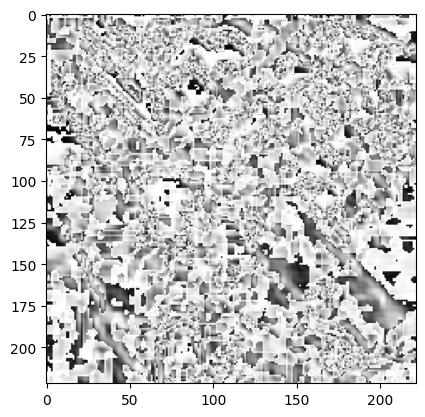

In [20]:
# Define the edge detection filter
edge_filter_x = torch.Tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
edge_filter_y = torch.Tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
edge_filter = torch.stack([edge_filter_x, edge_filter_y], dim=0)

# Create a convolutional layer for edge detection
edge_detector = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=1, padding=0, bias=False)
edge_detector.weight.data = edge_filter.unsqueeze(1).repeat(1, 3, 1, 1)

# Apply edge detection to the input image
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
img_tensor = transform(img).unsqueeze(0)
output = edge_detector(img_tensor)

# Transform the output tensor to a suitable format for display
output_img = transforms.functional.to_pil_image(output.squeeze())

# Show the output image
plt.imshow(output_img)
plt.show()


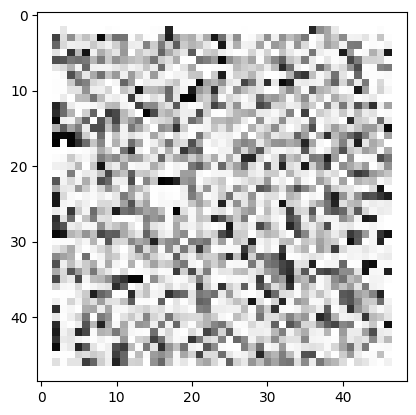

In [21]:
# Define the edge detection filter
edge_filter_x = torch.Tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
edge_filter_y = torch.Tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
edge_filter = torch.stack([edge_filter_x, edge_filter_y], dim=0)

# Create a convolutional layer for edge detection
edge_detector = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=5, padding=10, bias=False)
edge_detector.weight.data = edge_filter.unsqueeze(1).repeat(1, 3, 1, 1)

# Apply edge detection to the input image
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
img_tensor = transform(img).unsqueeze(0)
output = edge_detector(img_tensor)

# Transform the output tensor to a suitable format for display
output_img = transforms.functional.to_pil_image(output.squeeze())

# Show the output image
plt.imshow(output_img)
plt.show()

### Reflectie

Zijn 'Industrial_1.jpg' en 'Forrest_1.jpg' na een convolutie beter te onderscheiden?

In [22]:
# Extra: varieer de stride en de padding en toon de resultaten

### Reflectie

Wat is de invloed van padding en stride op de uitkomst?

### Opdracht 3: pooling uitvoeren

Met PyTorch Functional kunnen we ook een pooling filter toepassen.

In [23]:
# a. Bekijk de pooling opties en kies de juiste avg-variant

# b. Pas pooling toe op de afbeelding 'Industrial_1.jpg':

#    - Kies een 3x3 kernel en een stride van 1

# c. Herhaal de bovenstaande stappen voor voor 'Forrest_1.jpg'

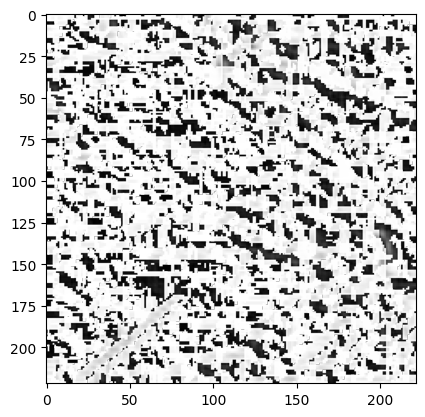

In [24]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import io

# Path to the input image
img_path = "./../../../pics/2750/Forest/Forest_1.jpg"

# Read the image using PyTorch's io module
industrial = io.read_image(img_path)

# Open the image using PIL and apply transformations
img = Image.open(img_path)
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
img_tensor = transform(img)

# Transform the tensor to a suitable format for display
transform = transforms.ToPILImage()
img = transform(img_tensor)

# Show the input image
img.show()

# Define the edge detection filter
edge_filter_x = torch.Tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
edge_filter_y = torch.Tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
edge_filter = torch.stack([edge_filter_x, edge_filter_y], dim=0)

# Create a convolutional layer for edge detection
edge_detector = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=1, padding=0, bias=False)
edge_detector.weight.data = edge_filter.unsqueeze(1).repeat(1, 3, 1, 1)

# Apply edge detection to the input image
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
img_tensor = transform(img).unsqueeze(0)
output = edge_detector(img_tensor)

# Transform the output tensor to a suitable format for display
output_img = transforms.functional.to_pil_image(output.squeeze())

# Show the output image
plt.imshow(output_img)
plt.show()


### Reflectie

Komt de visuele uitkomst overeen met je verwachtingen?

In [25]:
# Extra: varieer de stride en de kernel

### Reflectie

Wat is de invloed van padding en stride op de uitkomst?

### Opdracht 4: convolutie en pooling combineren

Een convolutional neural net combineert afwisselend convolutie en pooling in de eerste lagen.

We kunnen nu het effect van deze combinatie onderzoeken:

- Convolutie
- Pooling

In [26]:
# a. Bedenk en maak zelf een 2d convolution filter

# b. Bedenk en maak zelf een 2d pooling filter

# c. Pas nu de convolutie toe op 'Industrial_1.jpg'

# d. Pas vervolgens een pooling toe op de uitkomst van c.

# e. Doe hetzelfde voor de afbeelding 'Forrest_1.jpg'

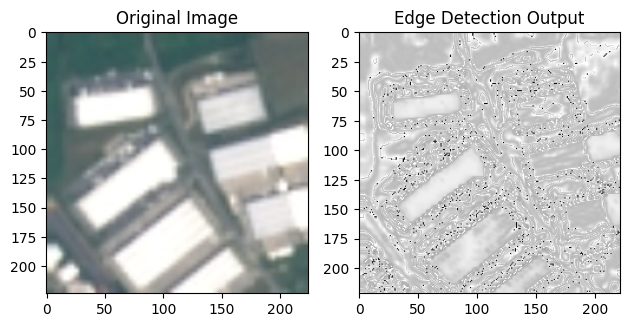

In [27]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import io

# Path to the input image
img_path = "./../../../pics/2750/Industrial/Industrial_10.jpg"

# Read the image using PyTorch's io module
industrial = io.read_image(img_path)

# Open the image using PIL and apply transformations
img = Image.open(img_path)
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
img_tensor = transform(img)

# Transform the tensor to a suitable format for display
transform = transforms.ToPILImage()
img = transform(img_tensor)

# Show the original input image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

# Define the edge detection filter
edge_filter_x = torch.Tensor([[1, 1, 0], [1, 0, 1], [0, 1, 1]])
edge_filter_y = torch.Tensor([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
edge_filter = torch.stack([edge_filter_x, edge_filter_y], dim=0)

# Create a convolutional layer for edge detection
edge_detector = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=1, padding=0, bias=False)
edge_detector.weight.data = edge_filter.unsqueeze(1).repeat(1, 3, 1, 1)

# Apply edge detection to the input image
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
img_tensor = transform(img).unsqueeze(0)
output = edge_detector(img_tensor)

# Transform the output tensor to a suitable format for display
output_img = transforms.functional.to_pil_image(output.squeeze())

# Show the output image
plt.subplot(1, 2, 2)
plt.imshow(output_img)
plt.title("Edge Detection Output")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the images
plt.show()


### Reflectie

- Verschilt de uitkomst veel van de combinatie veel met convolutie en pooling?
- En zijn de afbeeldingen 'Industrial_1.jpg' en 'Forrest_1.jpg' beter te onderscheiden?

In [28]:
# Extra: bereid de combinatie uit met nog een extra convolutie en pooling laag

### Reflectie

Heeft een extra laag veel invloed op de onderscheidbaarheid van de afbeeldingen?

### Opdracht 5: dataset prepareren

Om het neurale netwerk te trainen moeten we de dataset opsplitsen in labels (Y, de categoriën) en input afbeeldingen (X).

In [29]:
# a. Denk nog eens terug aan hoe we kruisjes van rondjes van elkaar konden onderscheiden

#    - Hoe representeerden we de labels?
#    - Hoe representeerden we de kruisjes en de rondjes?
#    - Hoe combineerden we dit tot een dataset?

# b. Hoe kunnen we de labels 'Industrials' en 'Forrest' dus representeren?

# c. Vorm nu een dataset voor 'Industrials' en 'Forrest'

# d. Extra: implementeer bovenstaande via een Dataset en DataLoader class
#           (zie https://pytorch.org/docs/stable/data.html voor verdere details)

In [30]:
import os
from image_filter import ImageFilter
from PIL import Image
import numpy as np

In [31]:
IndustrialsDirectory = './../../../pics/2750/Industrial'
ForrestDirectory = './../../../pics/2750/Forest'

edgeFiles = list()
 
for filename in os.listdir(IndustrialsDirectory):
    imgFile = os.path.join(IndustrialsDirectory, filename)

    if ".jpg" in imgFile:
        edgeFiles.append(imgFile)
        
for filename in os.listdir(ForrestDirectory):
    imgFile = os.path.join(ForrestDirectory, filename)

    if ".jpg" in imgFile:
        edgeFiles.append(imgFile)
        
imageTensors = [ plt.imread(pic).astype(float) for pic in edgeFiles ]
nrOfImages = len(imageTensors)

imageTensors = [ imageTensor/255 for imageTensor in imageTensors ]

labelNames, labelNumbers = ([], [])

for i, fileName in enumerate(edgeFiles):
    labelNames.append(fileName.split('/')[4])
    labelNumbers.append(i)
    
print(f"De eerste Image heeft label {labelNames[0]}")
print(f"De laatste Image heeft label {labelNames[nrOfImages-1]}")

De eerste Image heeft label pics
De laatste Image heeft label pics


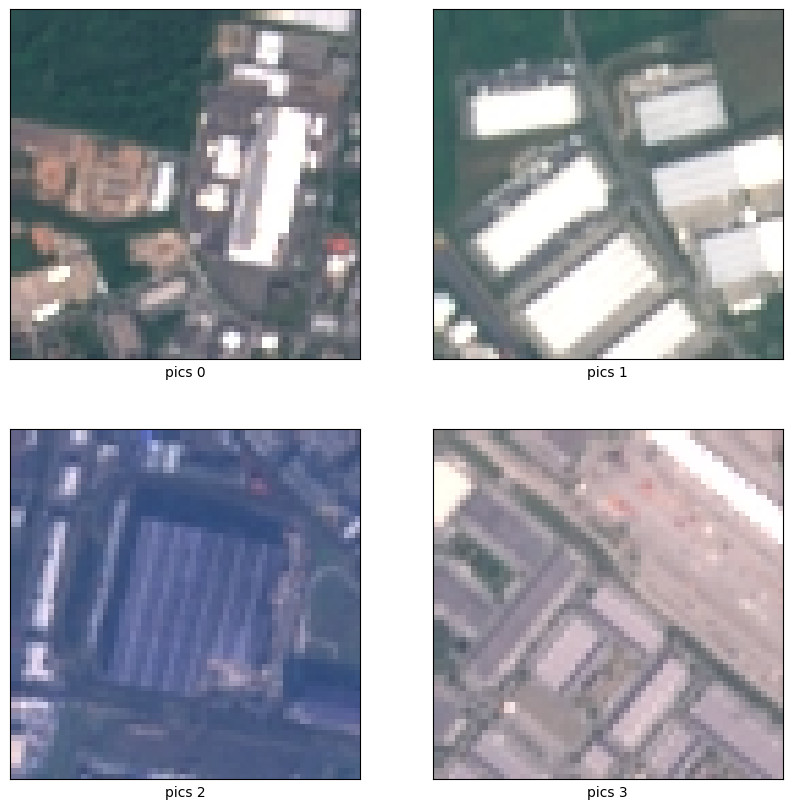

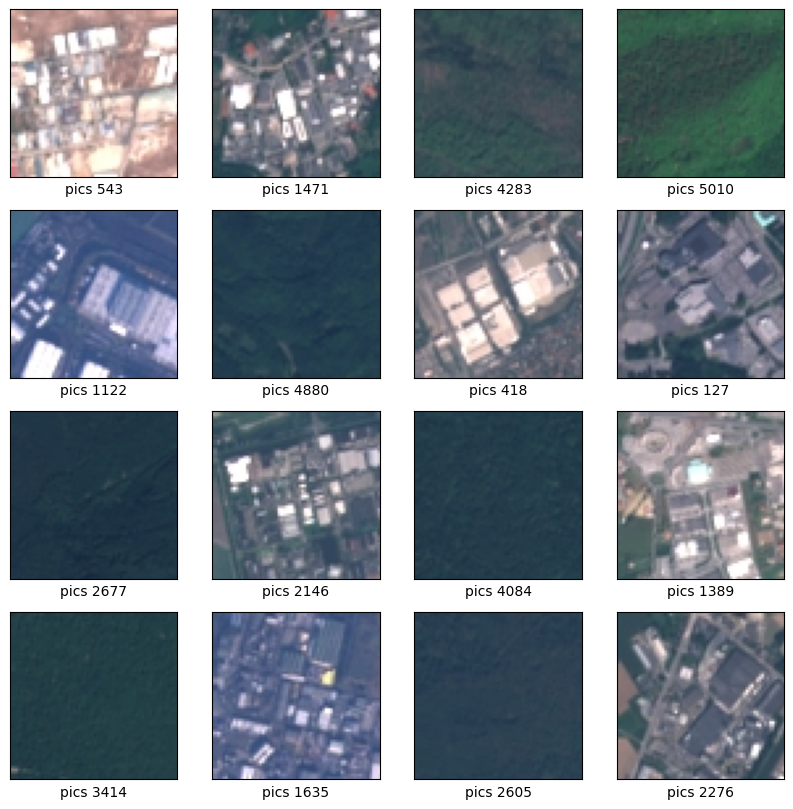

In [32]:
def showImages():
    
    plt.figure(figsize=(10,10))
    
    for i in range(4):
        
        # Maak een 2 x 2 raster van Images
        plt.subplot(2, 2, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)        
                
        # Van Tensor terug naar Image
        plt.imshow(imageTensors[i])
        
        # Bijbehorende Imagelabel
        plt.xlabel( f"{labelNames[labelNumbers[i]]} {labelNumbers[i]}" ) 

    plt.show()
showImages()

import random

def showRandomImages():
  
    random_indices = random.sample(range(len(imageTensors)), 16)
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        
        
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)        
                
       
        plt.imshow(imageTensors[random_indices[i]])
        
       
        label_number = labelNumbers[random_indices[i]]
        label_name = labelNames[label_number]
        plt.xlabel(f"{label_name} {label_number}") 

    plt.show()

showRandomImages()

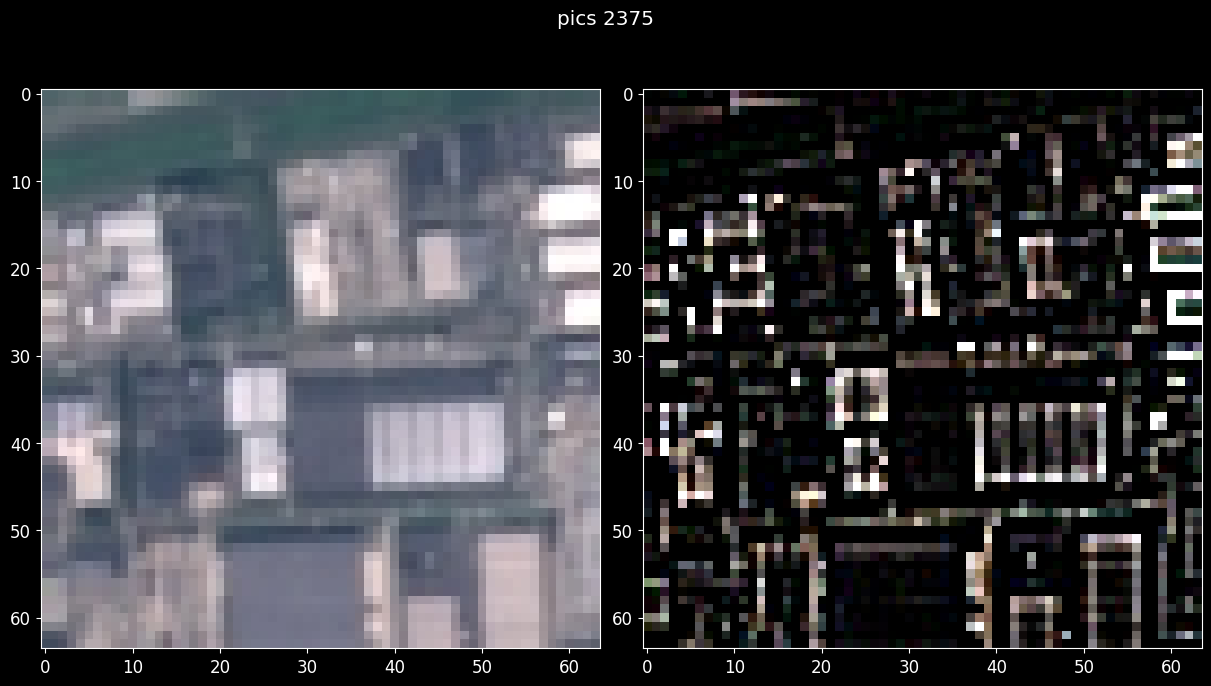

In [33]:
def plotImgs(lImg, rImg):
    plt.style.use('dark_background') 
    plt.rcParams["font.size"] = 12
    plt.rcParams["figure.figsize"] = (12, 7)

    fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
    fig.suptitle(f"{labelNames[labelNumbers[randInd]]} {labelNumbers[randInd]}")
    imL = axL.imshow(np.clip(lImg, 0, 1), interpolation="none")
    imR = axR.imshow(np.clip(rImg, 0, 1), interpolation="none")  
    
isoTropicFilter = ImageFilter( 
    np.array (
        [
            [-1, -1, -1], 
            [-1,  8, -1], 
            [-1, -1, -1]
        ]
    ) 
)

randInd = random.randint(0, nrOfImages)
imgOrg = imageTensors[randInd]
imgFiltered = isoTropicFilter.convolve(imgOrg)

plotImgs(imgOrg, imgFiltered)

### Opdracht 6: CNN ontwerpen

We kunnen een convolutional neural net opbouwen met convolutie, pooling en fully connected lagen. Hieronder definiëren we een topologie om een afbeeldingen van 32 x 32 te onderscheiden.

De topologie is gebaseerd op de blog post 'A simple CNN with Pytorch'. Dus zie het artikel voor extra details.

In [34]:
#-------------------------------------------------------

class CNN(nn.Module):
    
    #-------------------------------------------------------
    
    def __init__(self):
        
        # Because we inherit from Module base class
        super().__init__()
        
        # RGB input, 6 filters, kernel of 5 x 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # Filter is 2 x 2 with a stride of 2 (defined once, used two times)
        self.pool = nn.MaxPool2d(2, 2)
        
        # in_channels = 6 because self.conv1 output has 6 channels
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Fully connected layer matched on output of conv2 layer
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        
        # Fully connected layer
        self.fc2 = nn.Linear(120, 84)
        
        # We only have 2 labels
        self.fc3 = nn.Linear(84, 2)
        
    #-------------------------------------------------------
        
    def forward(self, x):
        
        # Convolution with relu layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # To match the output of the conv2 layer onto the first fully connected layer
        # Like reshape() but makes no copy (reuses underlaying data)
        x = x.view(-1, 16 * 13 * 13)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # No activation on final layer 
        return self.fc3(x)

#-------------------------------------------------------

### Opdracht 7: CNN trainen

Het trainen van een CNN is identiek aan het trainen van een fully connected (a.k.a. dense) netwerk.

In [35]:
# a. Ga voor jezelf na welke stappen een typisch trainingsproces bevat

# b. Bekijk de blog post 'A simple CNN in Python' en zet de training op

# c. Het voorbeeld bevat geen validatie tijdens de trainingsstap (epoch)

#    - Bekijk het Notebook met de de postcode FastScan
#      en bereid de training uit met validatie in de trainingsloop

### Opdracht 8: dropout toevoegen

Om het netwerk effectiever te trainen wordt dropout toegepast.

PyTorch maakt het toevoegen van dropout makkelijk.

In [36]:
# a. Bekijk het artikel Using Dropout Regularization in PyTorch Models (zie sources)

# b. Pas nu dropout toe op een hidden layer van je model

# c. Hertrain je model

#    - Let er op dat je je model evalueert in eval() mode
#    - Heeft de dropout invloed op de accuracy van je model?

### Reflectie

- Wat gebeurt er als de dropout groot is (bijvoobeeld 0.9)?